In [1]:
# Run this cell to load the graphics packages

using Plots; gr()
using Interact

In [2]:
# Run this cell to use a couple of definitions from the previous Tools notebook

σ(x) = 1 / (1 + exp(-x))
f(x, w) = σ(w * x)

f (generic function with 1 method)

## Multiple function parameters

In notebook 6, we saw how we could adjust a parameter to make a curve fit a single data point. What if there is more data to fit?

We'll see that as we acquire more data to fit, it can sometimes be useful to add complexity to our model via additional parameters.

## Adding more data

Suppose there are now two data points to fit, the previous $(x_0, y_0)$ used in notebook 6 and also $(x_1, y_1) = (-3, 0.3)$.

#### Exercise 1

Make an interactive plot of the function $f_w$ together with the two data points. Can you make the graph of $f_w$ pass through *both* data points at the *same* time?

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 0.0 Float64 , "w", 0.0, "0.0", 1001, Interact.OptionDict(DataStructures.OrderedDict("-10.0"=>-10.0,"-9.99"=>-9.99,"-9.98"=>-9.98,"-9.97"=>-9.97,"-9.96"=>-9.96,"-9.95"=>-9.95,"-9.94"=>-9.94,"-9.93"=>-9.93,"-9.92"=>-9.92,"-9.91"=>-9.91…), Dict(-2.03=>"-2.03",-6.32=>"-6.32",9.84=>"9.84",-2.43=>"-2.43",8.66=>"8.66",1.19=>"1.19",7.4=>"7.4",7.72=>"7.72",-2.13=>"-2.13",-5.25=>"-5.25"…)), Any[], Any[], true, "horizontal", true)

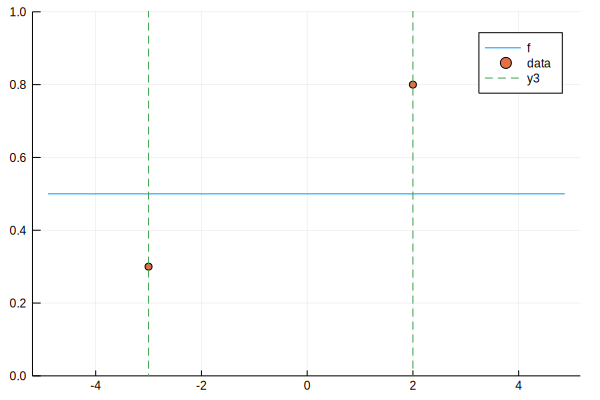

In [4]:
x0, y0 = 2, 0.8
x1, y1 = -3, 0.3

@manipulate for w in -10:0.01:10
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f")
    scatter!([x0, x1], [y0, y1], label="data")
    
    vline!([x0, x1], ls=:dash)
end

In [ ]:
x2, y2 = -2, 0.1
x3, y3 = -4, 0.2


Interact.Options{:SelectionSlider,Float64}(17: "input-5" = 0.0 Float64 , "w", 0.0, "0.0", 1001, Interact.OptionDict(DataStructures.OrderedDict("-10.0"=>-10.0,"-9.99"=>-9.99,"-9.98"=>-9.98,"-9.97"=>-9.97,"-9.96"=>-9.96,"-9.95"=>-9.95,"-9.94"=>-9.94,"-9.93"=>-9.93,"-9.92"=>-9.92,"-9.91"=>-9.91…), Dict(-2.03=>"-2.03",-6.32=>"-6.32",9.84=>"9.84",-2.43=>"-2.43",8.66=>"8.66",1.19=>"1.19",7.4=>"7.4",7.72=>"7.72",-2.13=>"-2.13",-5.25=>"-5.25"…)), Any[], Any[], true, "horizontal", true)

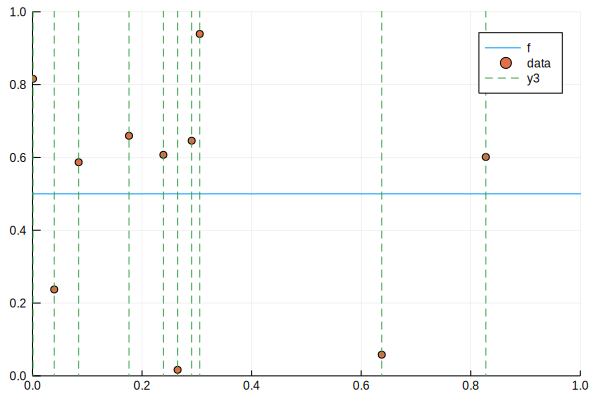

In [7]:
xs = rand(10)
ys = rand(10)

@manipulate for w in -10:0.01:10
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f")
    scatter!(xs, ys, label="data")
    
    vline!(xs, ls=:dash)
    
    xlims!(0, 1)
end

You should have found that it's actually *impossible* to fit both data points at the same time! The best we could do is to *minimise* how far away the function is from the data. To do so, we need to somehow balance the distance from each of the two data points.

#### Exercise 2

Play with the slider to find the value $w^*$ of $w$ that you think has the "least error" in an intuitive sense.

If I had more data, I should put the data in an array:

## Defining a loss function

How can we *quantify* some kind of overall measure of the distance from *all* of the data? Well, we just need to define a new loss function! One way to do so would be to sum up the loss functions for each data point, i.e. the sum of the squared vertical distances from the graph to each data point:

$$L(w) = [y_0 - f_w(x_0)]^2 + [y_1 - f_w(x_1)]^2.$$

Since the two pieces that we are adding have the same mathematical "shape" or structure, we can abbreviate this by writing it as a sum:

$$L(w) = \sum_{i=0}^1 [y_i - f_w(x_i)]^2.$$

So now we want to find the value $w^*$ of $w$ that minimizes this new function $L$!

#### Exercise 3

Make an interactive visualization to show the function $f_w$ and to visualize the distance from each of the data points.

#### Exercise 4

After playing with this for a while, it is intuitively obvious that we cannot make the function pass through both data points for any value of $w$. In other words, our loss function, `L(w)`, is never zero.

What is the minimum value of `L(w)` that you can find by altering `w`? What is the corresponding value of `w`?

### Sums in Julia

To generate the above plot we used the `sum` function. `sum` can add together all the elements of a collection or range, or it can add together the outputs of applying a function to all the elements of a collection or range. 

Look up the docs for `sum` via

```julia
?sum
```
if you need more information.

#### Exercise 5

Use `sum` to add together all integers in the range 1 to 16, inclusive. What is the result?

#### Exercise 6

What is the sum of the absolute values of all integers between -3 and 3? Use `sum` and the `abs` function.

## What does the loss function $L$ look like?

In our last attempt to minimize `L(w)` by varying `w`, we saw that `L(w)` always seemed to be greater than 0.  Is that true? Let's plot it to find out!

#### Exercise 7

Plot the new loss function $L(w)$ as a function of $w$.

In [8]:
L_new(w) = (y0 - f(x0, w))^2 + (y1 - f(x1, w))^2

L_new (generic function with 1 method)

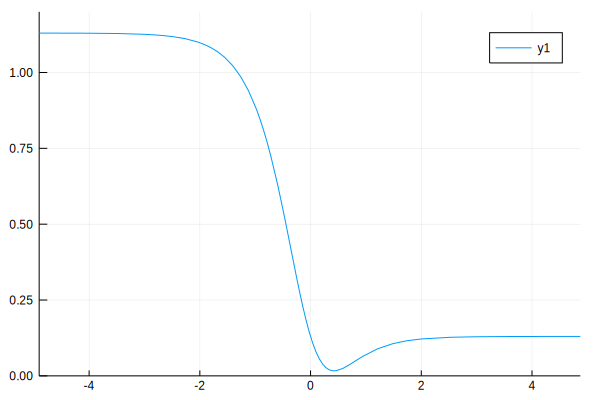

In [10]:
plot(L_new)
ylims!(0, 1.2)

### Features of the loss function

The first thing to notice is that $L$ is always positive. Since it is the sum of squares, and squares cannot be negative, the sum cannot be negative either! 

However, we also see that although $L$ dips close to $0$ for a single, special value $w^* \simeq 0.4$, it never actually *reaches* 0! Again we could zoom in on that region of the graph to estimate it more precisely.

We might start suspecting that there should be a better way of using the computer to minimize $L$ to find the location $w^*$ of the minimum, rather than still doing everything by eye. Indeed there is, as we will see in the next two notebooks!

## Adding more parameters to the model

If we add more parameters to a function, we may be able to improve how it fits to data. For example, we could define a new function $g$ with another parameter, a shift or **bias**:

$$g(x; w, b) := \sigma(w \, x) + b.$$

In [15]:
g(x, w, b) = σ(w*x) + b

g (generic function with 1 method)

*Note*: In the last notebook, we added parameters to a sigmoid function to get the form $$\sigma(w \, x + b)$$ and here we are working with the form $$\sigma(w \, x) + b$$
instead. Both of these are valid ways to apply a bias to a function! In machine learning terminology, the first corresponds to a neural network with a single neuron, while the second can be thought of as a network with two layers.

#### Exercise 8

Make an interactive visualization with two sliders for $w$ and $b$. Play with the sliders to try and fit *both* data points at once!

In [26]:
gr()

Plots.GRBackend()

Interact.Options{:SelectionSlider,Float64}(50: "input-16" = 0.0 Float64 , "w", 0.0, "0.0", 31, Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…), Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(52: "input-17" = 0.0 Float64 , "b", 0.0, "0.0", 31, Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…), Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)), Any[], Any[], true, "horizontal", true)

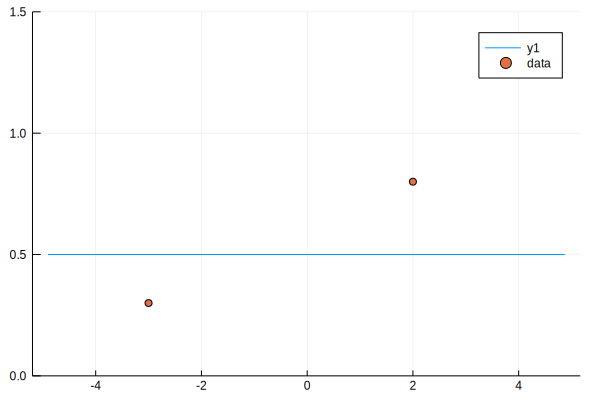

In [28]:
@manipulate for w in -3:0.1:3, b in -3:0.1:3
    plot(x->g(x, w, b))
    scatter!([x0, x1], [y0, y1], label="data")
    
    ylims!(0, 1.5)
end

#### Exercise 9

For what values of `w` and `b` does the line pass through both points?

## Fitting both data points: a loss function

Following the procedure that we used when we had a single parameter, we can think of the fitting procedure once again as minimizing a suitable *loss function*. The expression for the loss function is almost the same, except that now $f$ has two parameters $w$ and $b$, so the loss function $L_2$ is itself a function of $w$ *and* $b$:

$$L_2(w, b) = \sum_i [y_i - f(x_i; w, b)]^2.$$

So we want to minimize this loss function over *both* of the parameters $w$ and $b$! Let's plot it.

#### Exercise 10

Define the function `L2` in Julia.

## More data

If we add more data, however, we will again not be able to fit all of the data; we will only be able to attain a "best fit".

Let's create `xs` and `ys` with some more data:

In [ ]:
xs = [2, -3, -1, 1]
ys = [0.8, 0.3, 0.4, 0.4]

#### Exercise 11

a) Make an interactive visualization of the function $f$ and the data. Try to find the values of $w$ and $b$ that give the best fit.

b) Define the loss function and plot it.

#### Exercise 12

We've seen the loss function, $$L_{2D}(w, b) = \sum_i[\mathrm{ys}_i - g(\mathrm{xs}_i, w, b)]^2,$$ written in Julia as

```julia
L2(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2 )
```

a few times now. To ensure you understand what this function is doing, implement your own loss function using the commented code below. Do this without using `sum`, `abs2`, or broadcasting dot syntax (for example, `.-`). Hint: you'll want to use a `for` loop to do this.

In [ ]:
# function myL2(w, b)
#     loss = 0.0
    
#     return loss
# end

Now that you've defined `L2`, we can plot it using `surface`!

In [16]:
L2(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2 )

L2 (generic function with 1 method)

In [17]:
xs = [2, -3, -1, 1]
ys = [0.8, 0.3, 0.4, 0.4]

4-element Array{Float64,1}:
 0.8
 0.3
 0.4
 0.4

Interact.Options{:SelectionSlider,Float64}(56: "input-18" = 0.0 Float64 , "w", 0.0, "0.0", 31, Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…), Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(58: "input-19" = 0.0 Float64 , "b", 0.0, "0.0", 31, Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.9"=>-2.9,"-2.8"=>-2.8,"-2.7"=>-2.7,"-2.6"=>-2.6,"-2.5"=>-2.5,"-2.4"=>-2.4,"-2.3"=>-2.3,"-2.2"=>-2.2,"-2.1"=>-2.1…), Dict(1.2=>"1.2",-2.3=>"-2.3",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.4=>"1.4",-2.2=>"-2.2",-3.0=>"-3.0",0.2=>"0.2",-0.5=>"-0.5"…)), Any[], Any[], true, "horizontal", true)

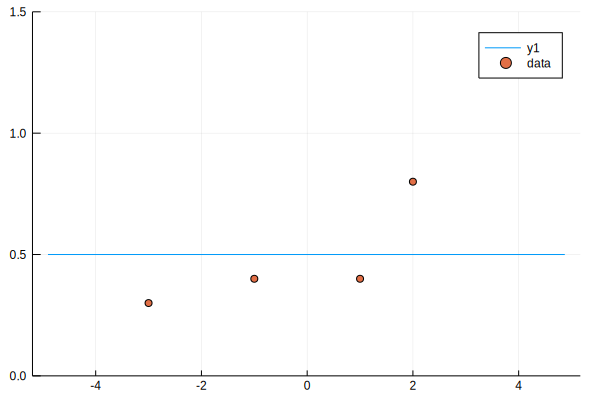

In [29]:
@manipulate for w in -3:0.1:3, b in -3:0.1:3
    plot(x->g(x, w, b))
    scatter!(xs, ys, label="data")
    
    ylims!(0, 1.5)
end

In [20]:
plotlyjs()

ws = -2:0.05:2
bs = -2:0.05:2

surface(ws, bs, L2, alpha=0.8, zlims=(0,3))

xlabel!("w")
ylabel!("b")
#zlabel!("L2(w, b)")